0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


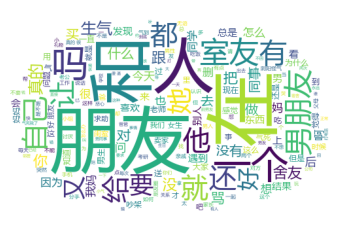

In [13]:
# -*- coding: utf-8 -*-
import requests
from lxml import etree
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import numpy as np
import jieba
import time
from collections import Counter
from openpyxl import Workbook

title_list = []


def get_response(url):
    head = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
    }
    # 如果访问成功,返回网页,不然则打印访问网页错误
    response = requests.get(url, headers=head)
    if response.status_code == 200:
        return response.text
    else:
        print("访问网页错误")


def parse_data(response):
    # 用xpath解析到标题的数据,并将数据添加到 title_list 列表中
    data = etree.HTML(response)
    titles = data.xpath('//*[@id="content"]/div/div[1]/div[2]/table/tr/td[1]/a/text()')
    title = "".join(titles).replace(" ", "").replace("\n", "")
    title_list.append(title)


def wordcloud(title):
    # 分词
    cut = jieba.cut(title)
    string = " ".join(cut)
    # 打开遮罩图片
    img = Image.open(r"prcie.jpg")
    # 将图片转换为数组
    img_array = np.array(img)
    # 设置参数
    wc = WordCloud(
        background_color='white',
        mask=img_array,
        font_path="msyh.ttc",
        stopwords = STOPWORDS.update('的','我','了','被','说','不','是')
    )
    wc.generate_from_text(string)
    fig = plt.figure(1)
    plt.imshow(wc)
    # 是否显示坐标轴
    plt.axis('off')
    # 显示生成的词云图片,可以直接保存就注释了
    # plt.show()
    # 保存
    plt.savefig(r'wordcloud.jpg', dpi=500)


def statistics_word(title):
    cut = jieba.cut(title)
    cutList = []
    # 分词
    for word in cut:
        if (word in title) and len(word) > 1:
            cutList.append(word)
    wordList = []
    # 统计每个词出现的次数
    wordList = Counter(cutList)
    # 统计出现的次数最多的N个词及出现的次数
    wordListNTop = wordList.most_common(10)
    # 保存到excel里面
    file = Workbook()
    sheet = file.active
    # 设置标题
    sheet.append(["排名", "出现的次数"])
    for i in wordListNTop:
        sheet.append(i)
    file.save('cipin.xlsx')


def main():
    # 一页30个,循环67次
    for i in range(67):
        print(i)
        time.sleep(1)
        url = "https://www.douban.com/group/667875/discussion?start=" + str(i * 25) + ""
        response = get_response(url)
        parse_data(response)
    # 把所有的标题整理成一个字符串
    title_all = "".join(title_list)
    # 调用保存词云函数
    wordcloud(title_all)
    # 调用统计词频函数
    statistics_word(title_all)


if __name__ == '__main__':
    main()
